In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from pathlib import Path
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

In [3]:
asset = 'ETH' 
freq = '1min'

DATA_DIR = Path('../dataset')
path = DATA_DIR / f"{asset}_{freq}.csv"
if path.exists():
    print(f'Loading {asset} from {path}')
    df = pd.read_csv(path,index_col=0)
    df['timestamp'] = pd.to_datetime(df["system_time"])
    df['timestamp'] = df['timestamp'].dt.round('min')
    df = df.sort_values('timestamp').set_index('timestamp')
print(f"{asset}: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head(3))

Loading ETH from ../dataset/ETH_1min.csv
ETH: 17110 rows, 155 columns


,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-04-07 11:34:00+00:00,2021-04-07 11:33:49.861733+00:00,1965.845000,0.010000,875154.482918,1684773.987938,-0.000003,-0.000155,-0.000160,-0.000257,-0.000262,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:35:00+00:00,2021-04-07 11:34:49.861733+00:00,1969.645000,0.650000,514168.079888,858218.969496,-0.000165,-0.000190,-0.000201,-0.000206,-0.000216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-04-07 11:36:00+00:00,2021-04-07 11:35:49.861733+00:00,1975.595000,0.290000,729915.129243,1446983.975930,-0.000073,-0.000078,-0.000094,-0.000099,-0.000195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Missing and Zero values

In [4]:
print(f"Missing values: {df.isna().sum().sum()} total ({(df.isna().sum().sum()/df.size)*100:.3f}%)")

Missing values: 0 total (0.000%)


There are no missing values

In [5]:
print(f"Zero values: {df.isin([0]).sum().sum()} total ({(df.isin([0]).sum().sum()/df.size)*100:.3f}%)")

Zero values: 813158 total (30.661%)


But there are a lot of Zero values

In [6]:
# check for all columns except those related to 'market', 'cancel', 'limit'
most_zeros = df.columns.str.contains('market|cancel|limit', case=False)

print(f"Zero values without market/cancel/limit columns: {df[df.columns[~most_zeros]].isin([0]).sum().sum()} total ({(df[df.columns[~most_zeros]].isin([0]).sum().sum()/df[df.columns[~most_zeros]].size)*100:.3f}%)")
df[df.columns[~most_zeros]].isin([0]).sum().nlargest(5)

Zero values without market/cancel/limit columns: 23 total (0.002%)


asks_notional_0    12
bids_notional_0     8
bids_notional_6     1
bids_notional_7     1
asks_notional_1     1
dtype: int64

Most zero values are in additional descriptive columns {'market', 'cancel', 'limit'} 

In [7]:
market_columns = df.columns.str.contains('market', case=False)

print(f"Zero values in market columns: {df[df.columns[market_columns]].isin([0]).sum().sum()} total ({(df[df.columns[market_columns]].isin([0]).sum().sum()/df[df.columns[market_columns]].size)*100:.3f}%)")
df[df.columns[market_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in market columns: 481747 total (93.853%)


bids_market_notional_14    16877
bids_market_notional_12    16832
bids_market_notional_13    16827
bids_market_notional_11    16820
bids_market_notional_9     16777
asks_market_notional_14    16760
bids_market_notional_10    16758
asks_market_notional_13    16756
asks_market_notional_12    16746
bids_market_notional_8     16734
bids_market_notional_7     16719
asks_market_notional_11    16715
bids_market_notional_6     16678
asks_market_notional_10    16677
asks_market_notional_9     16618
bids_market_notional_5     16612
asks_market_notional_8     16557
bids_market_notional_4     16551
asks_market_notional_7     16517
bids_market_notional_3     16455
asks_market_notional_6     16424
asks_market_notional_5     16316
bids_market_notional_2     16275
asks_market_notional_4     16242
asks_market_notional_3     16057
bids_market_notional_1     15923
asks_market_notional_2     15712
asks_market_notional_1     14930
bids_market_notional_0     11417
asks_market_notional_0      8465
dtype: int

In [8]:
cancel_columns = df.columns.str.contains('cancel', case=False)

print(f"Zero values in cancel columns: {df[df.columns[cancel_columns]].isin([0]).sum().sum()} total ({(df[df.columns[cancel_columns]].isin([0]).sum().sum()/df[df.columns[cancel_columns]].size)*100:.3f}%)")
df[df.columns[cancel_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in cancel columns: 329912 total (64.273%)


bids_cancel_notional_8     11742
bids_cancel_notional_10    11714
bids_cancel_notional_9     11678
bids_cancel_notional_11    11678
bids_cancel_notional_12    11658
bids_cancel_notional_7     11644
bids_cancel_notional_6     11578
bids_cancel_notional_13    11562
bids_cancel_notional_14    11415
asks_cancel_notional_8     11332
asks_cancel_notional_11    11300
asks_cancel_notional_10    11285
asks_cancel_notional_9     11268
bids_cancel_notional_5     11258
asks_cancel_notional_6     11168
asks_cancel_notional_7     11149
asks_cancel_notional_12    11099
asks_cancel_notional_13    11075
bids_cancel_notional_4     11037
asks_cancel_notional_14    11004
asks_cancel_notional_5     10903
bids_cancel_notional_1     10795
bids_cancel_notional_2     10643
asks_cancel_notional_4     10571
bids_cancel_notional_3     10540
asks_cancel_notional_2     10402
asks_cancel_notional_1     10354
asks_cancel_notional_3     10116
asks_cancel_notional_0      9012
bids_cancel_notional_0      8932
dtype: int

In [9]:
limit_columns = df.columns.str.contains('limit', case=False)

print(f"Zero values in limit columns: {df[df.columns[limit_columns]].isin([0]).sum().sum()} total ({(df[df.columns[limit_columns]].isin([0]).sum().sum()/df[df.columns[limit_columns]].size)*100:.3f}%)")
df[df.columns[limit_columns]].isin([0]).sum().sort_values(ascending=False)

Zero values in limit columns: 1476 total (0.288%)


asks_limit_notional_14    110
asks_limit_notional_13    103
asks_limit_notional_11     86
asks_limit_notional_12     83
bids_limit_notional_14     80
asks_limit_notional_10     78
bids_limit_notional_13     76
asks_limit_notional_9      65
asks_limit_notional_6      58
bids_limit_notional_10     56
asks_limit_notional_8      56
bids_limit_notional_12     54
asks_limit_notional_4      51
asks_limit_notional_5      50
asks_limit_notional_7      48
bids_limit_notional_9      45
bids_limit_notional_11     41
asks_limit_notional_3      40
bids_limit_notional_7      34
asks_limit_notional_2      34
bids_limit_notional_4      31
bids_limit_notional_8      31
asks_limit_notional_1      28
bids_limit_notional_6      27
bids_limit_notional_3      24
bids_limit_notional_5      21
bids_limit_notional_2      21
bids_limit_notional_1      20
bids_limit_notional_0      15
asks_limit_notional_0      10
dtype: int64

Market and Cancel columns can include up to 90% of zero values (even for the 1st or 2nd level)

Limit_Notinal Asks and Bids include just a few zero values.

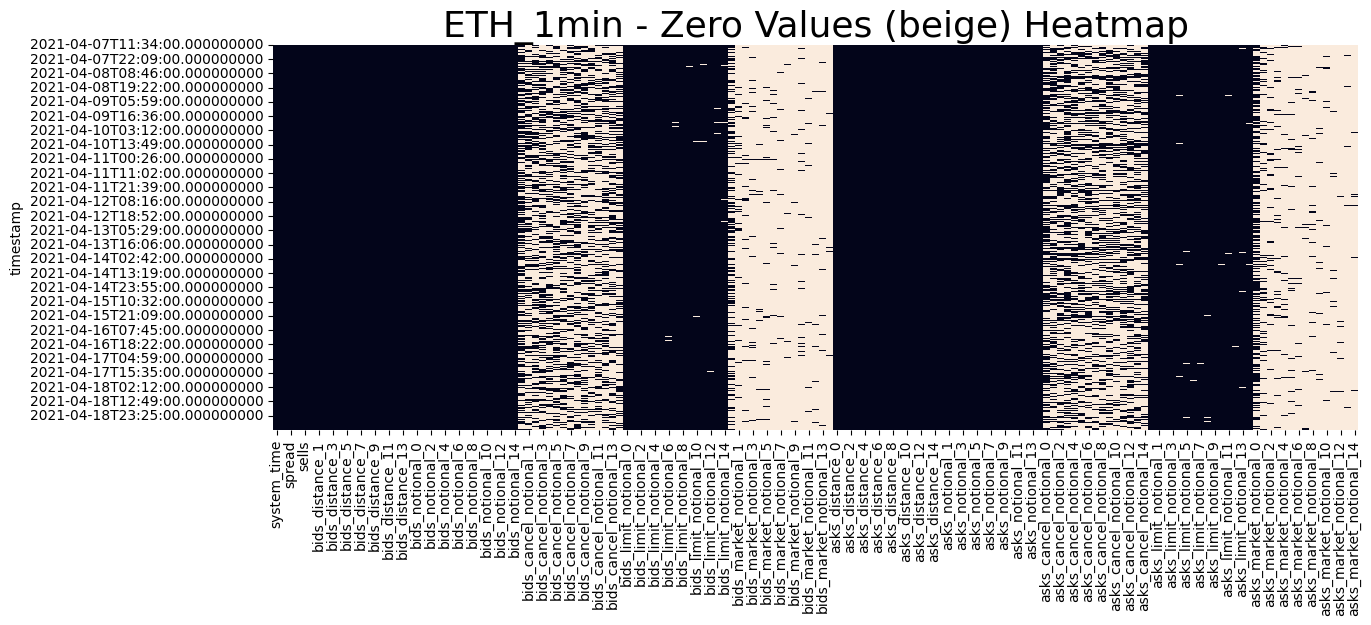

In [10]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(df == 0, cbar=False, ax=ax)
plt.title(f'{asset}_{freq} - Zero Values (beige) Heatmap', fontsize=26)
plt.show()

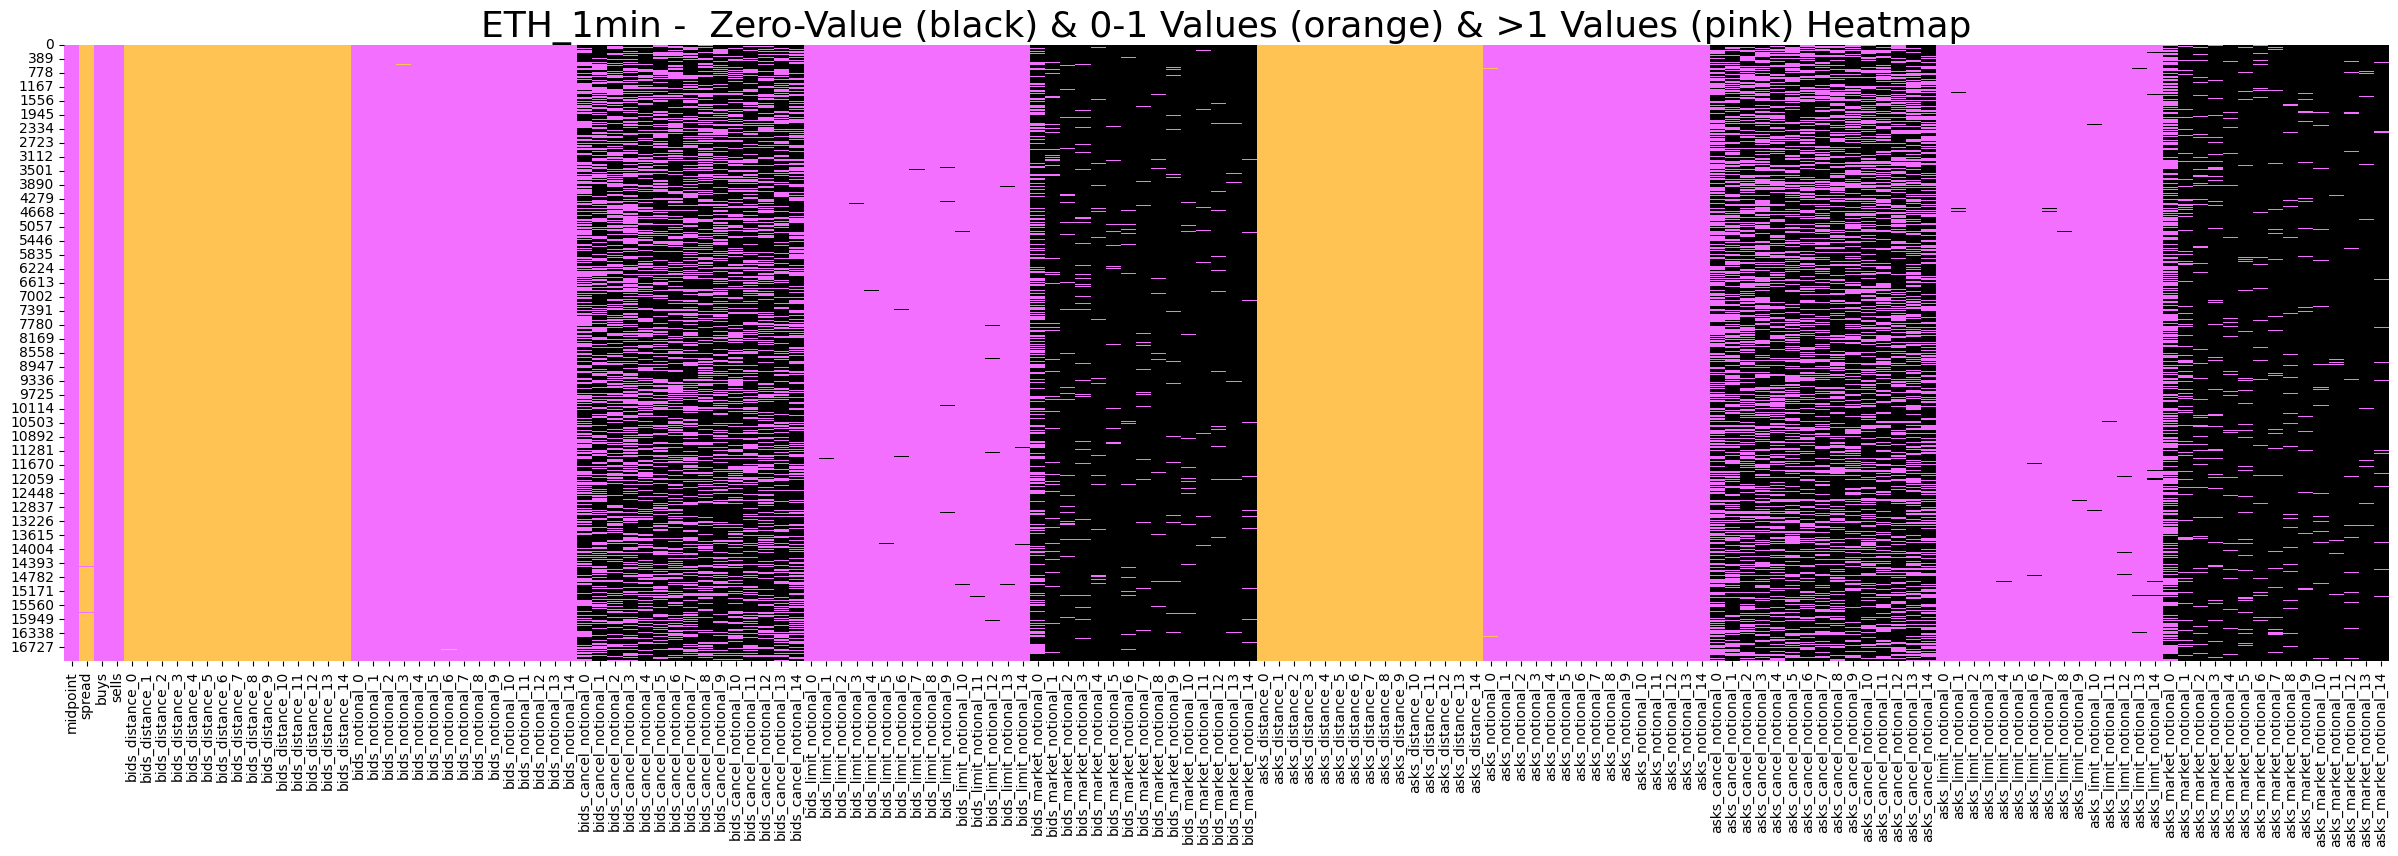

In [11]:

threshold_0 = 1e-7 
bins = np.array([threshold_0, 1.0])
data_abs = df.select_dtypes(include=[np.number]).abs().values
categories = np.digitize(data_abs, bins)

cmap_colors = ["#000000",  # 0
               "#ffc353",  #  (0, 1]
               "#f36fff"]  #  > 1
cmap = ListedColormap(cmap_colors)
norm = BoundaryNorm([0, 1, 2, 3], cmap.N) 


fig, ax = plt.subplots(figsize=(30, 8))
sns.heatmap(categories, 
            cmap=cmap, 
            norm=norm, 
            cbar=False,  
            ax=ax,
            xticklabels=df.select_dtypes(include=[np.number]).columns)

ax.set_title(f'{asset}_{freq} -  Zero-Value (black) & 0-1 Values (orange) & >1 Values (pink) Heatmap', fontsize=26)
plt.show()

Overall the data is well marked because there are no missing values and Zero values happens usually happens in the columns that are logically correct (Market and Cancel bids and asks). In the cryptocurancy the vast of trade orders are executed via "limit" operations, which is approved by the data. 

## General statistics

In [12]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 9)
pd.set_option('display.float_format', '{:.6f}'.format)

display(df.describe().transpose())

pd.reset_option('display.float_format')

,count,mean,std,min,25%,50%,75%,max
midpoint,17110.000000,2227.385540,154.629153,1937.430000,2122.515000,2167.812500,2378.037500,2546.405000
spread,17110.000000,0.153281,0.240279,0.010000,0.010000,0.010000,0.260000,11.640000
buys,17110.000000,185933.743742,269801.884804,833.221972,52251.783675,109192.606466,214743.705698,4663486.812841
sells,17110.000000,158002.630774,344861.500006,42.955611,26526.025961,67437.805421,164075.787703,11116638.814593
bids_distance_0,17110.000000,-0.000034,0.000055,-0.002831,-0.000058,-0.000002,-0.000002,-0.000002
bids_distance_1,17110.000000,-0.000078,0.000080,-0.002884,-0.000104,-0.000063,-0.000021,-0.000006
bids_distance_2,17110.000000,-0.000120,0.000097,-0.002943,-0.000154,-0.000097,-0.000061,-0.000010
bids_distance_3,17110.000000,-0.000156,0.000112,-0.002992,-0.000198,-0.000131,-0.000086,-0.000014
bids_distance_4,17110.000000,-0.000189,0.000128,-0.004494,-0.000238,-0.000163,-0.000111,-0.000018
bids_distance_5,17110.000000,-0.000221,0.000139,-0.004923,-0.000274,-0.000194,-0.000136,-0.000024


The only negative are "bids_distance_X", because they are calculated as "behind" midpoint.

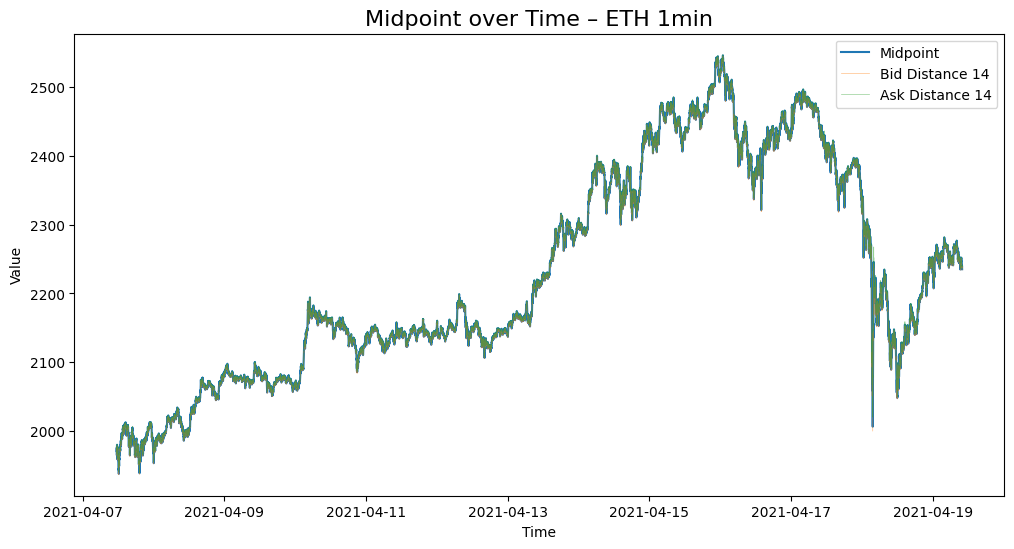

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['midpoint'], label='Midpoint', linewidth=1.5)
plt.plot(df.index, (1+df['bids_distance_14'])*df['midpoint'], label='Bid Distance 14', linewidth=0.5, alpha=0.5)
plt.plot(df.index, (1+df['asks_distance_14'])*df['midpoint'], label='Ask Distance 14', linewidth=0.5, alpha=0.5)
plt.legend()
plt.title(f'Midpoint over Time – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

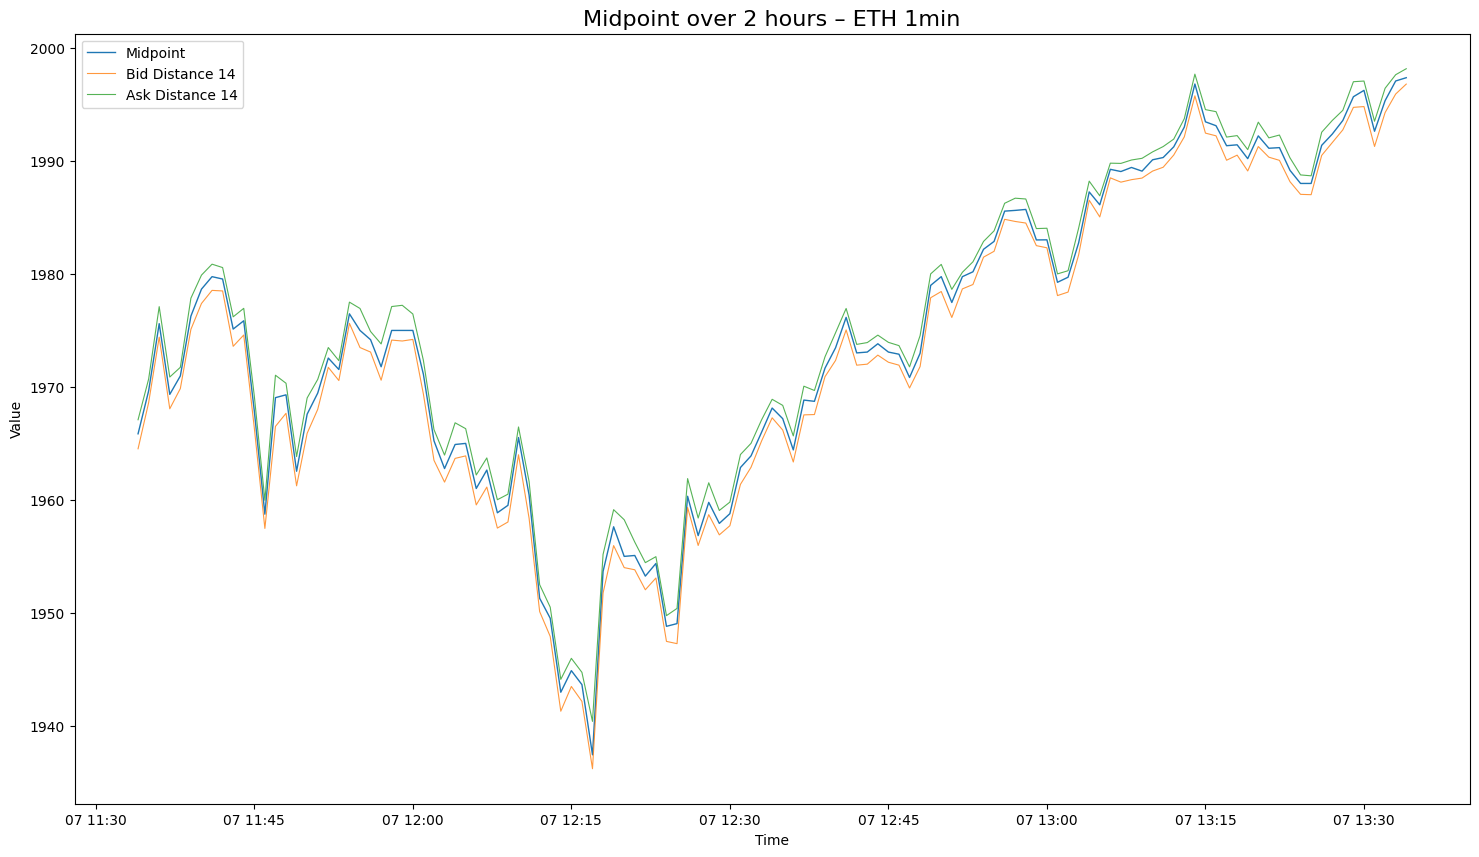

In [14]:
df_1day = df[df.index <= (df.index.min() + pd.Timedelta('2 hours'))]

plt.figure(figsize=(18, 10))
plt.plot(df_1day.index, df_1day['midpoint'], label='Midpoint', linewidth=1)
plt.plot(df_1day.index, (1+df_1day['bids_distance_14'])*df_1day['midpoint'], label='Bid Distance 14', linewidth=0.8, alpha=0.8)
plt.plot(df_1day.index, (1+df_1day['asks_distance_14'])*df_1day['midpoint'], label='Ask Distance 14', linewidth=0.8, alpha=0.8)
plt.legend()
plt.title(f'Midpoint over 2 hours – {asset} {freq}', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## Example of 3 rows

In [15]:
# VSC setting: "notebook.output.textLineLimit": 170

pd.reset_option('display.precision')
pd.reset_option('display.float_format')

transposed_df = df.head(3).transpose()
display(transposed_df)

timestamp,2021-04-07 11:34:00+00:00,2021-04-07 11:35:00+00:00,2021-04-07 11:36:00+00:00
system_time,2021-04-07 11:33:49.861733+00:00,2021-04-07 11:34:49.861733+00:00,2021-04-07 11:35:49.861733+00:00
midpoint,1965.845,1969.645,1975.595
spread,0.01,0.65,0.29
buys,875154.482918,514168.079888,729915.129243
sells,1684773.987938,858218.969496,1446983.97593
bids_distance_0,-0.000003,-0.000165,-0.000073
bids_distance_1,-0.000155,-0.00019,-0.000078
bids_distance_2,-0.00016,-0.000201,-0.000094
bids_distance_3,-0.000257,-0.000206,-0.000099
bids_distance_4,-0.000262,-0.000216,-0.000195


Even for the first 3 observations the data can highly variate. This is because of actively changing market.

In [16]:
transposed_df[transposed_df.index.str.endswith('_0')]

timestamp,2021-04-07 11:34:00+00:00,2021-04-07 11:35:00+00:00,2021-04-07 11:36:00+00:00
bids_distance_0,-0.000003,-0.000165,-0.000073
bids_notional_0,44445.929688,29539.800781,1278.369995
bids_cancel_notional_0,42265.558594,0.0,0.0
bids_limit_notional_0,86711.492188,29539.800781,1278.369995
bids_market_notional_0,0.0,0.0,0.0
asks_distance_0,0.000003,0.000165,0.000073
asks_notional_0,1.08,172.059998,2106.830078
asks_cancel_notional_0,0.0,36491.148438,3923.73999
asks_limit_notional_0,20005.570312,36921.578125,13438.839844
asks_market_notional_0,20004.490234,258.369995,7408.27002


The 0 level structure of the first 3 observations also shows that we are analysing actively changing market.


## Feature relatad visualizations

In [17]:
print(f'{asset} {freq} shape:', df.shape)

ETH 1min shape: (17110, 155)


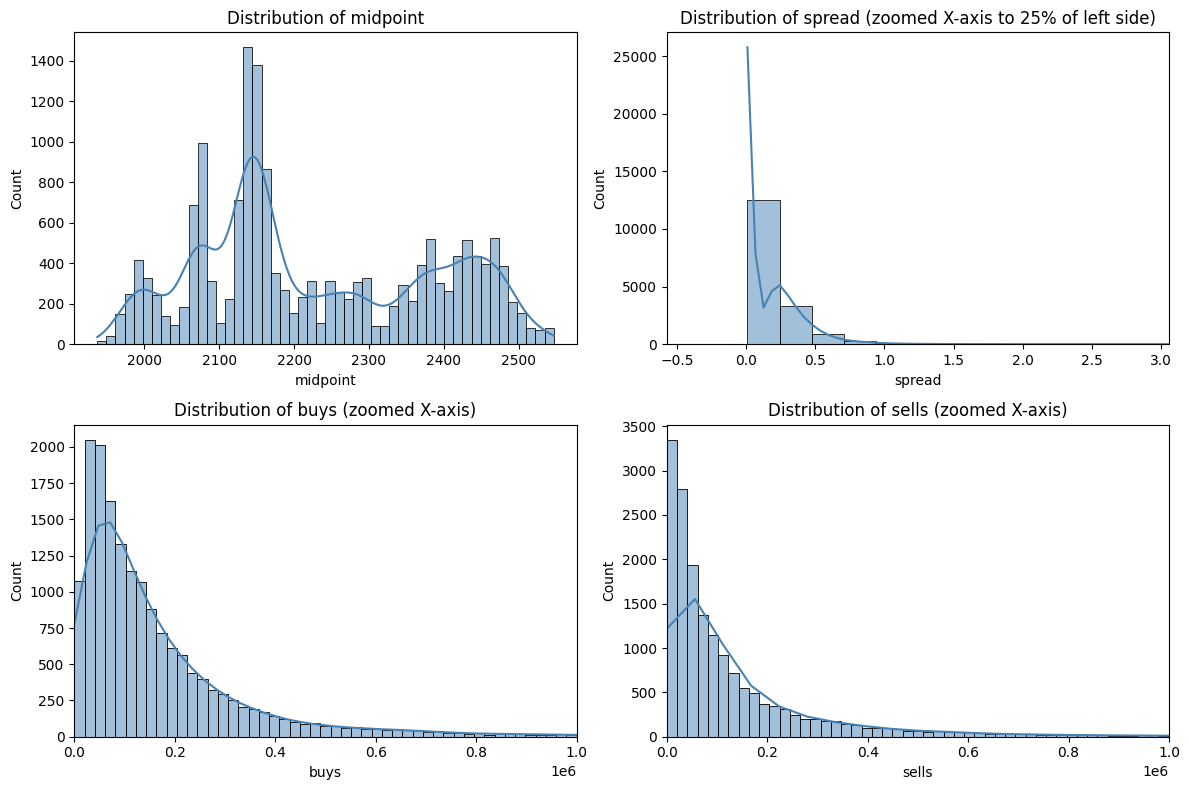

In [34]:
features_to_plot = ['midpoint', 'spread', 'buys', 'sells']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, f in enumerate(features_to_plot):
    if i==1:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_xlim(right=axs[i].get_xlim()[1]*0.25)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis to 25% of left side)')
    elif i==2 or i==3:
        axs[i].set_xlim(right=1*1e6)
        axs[i].set_title(f'Distribution of {f} (zoomed X-axis)')
        bins = np.linspace(0, axs[i].get_xlim()[1], 50)
        sns.histplot(df[f], bins=bins, ax=axs[i], kde=True, color='steelblue')
    elif i==0:
        sns.histplot(df[f], bins=50, ax=axs[i], kde=True, color='steelblue')
        axs[i].set_title(f'Distribution of {f}')
plt.tight_layout()
plt.show()

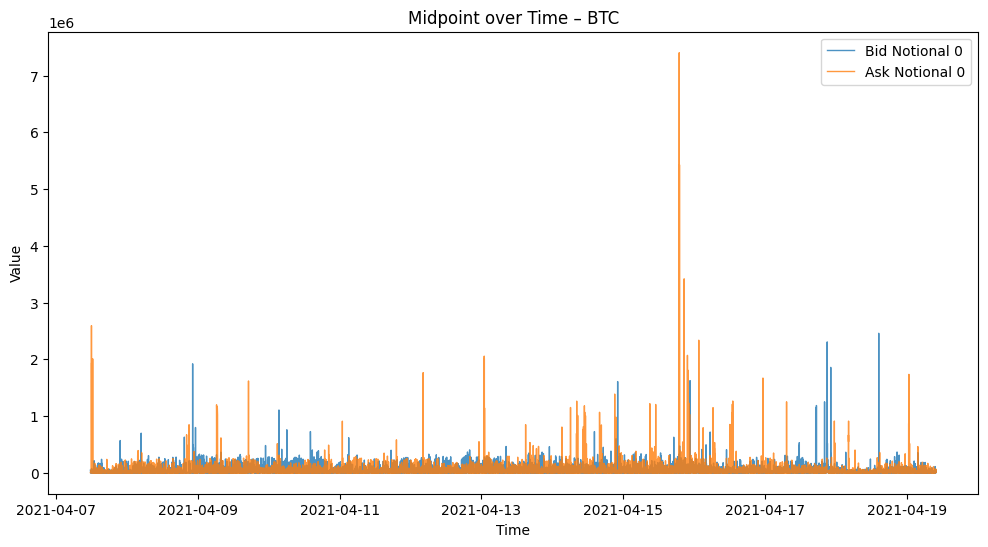

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bids_notional_0'], label='Bid Notional 0', linewidth=1, alpha=0.8)
plt.plot(df.index, df['asks_notional_0'], label='Ask Notional 0', linewidth=1, alpha=0.8)
plt.legend()
plt.title('Midpoint over Time – {} {}'.format(asset, freq), fontsize=16)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

There are some observations of with extreme large values of Bid/Ask notional volumes.

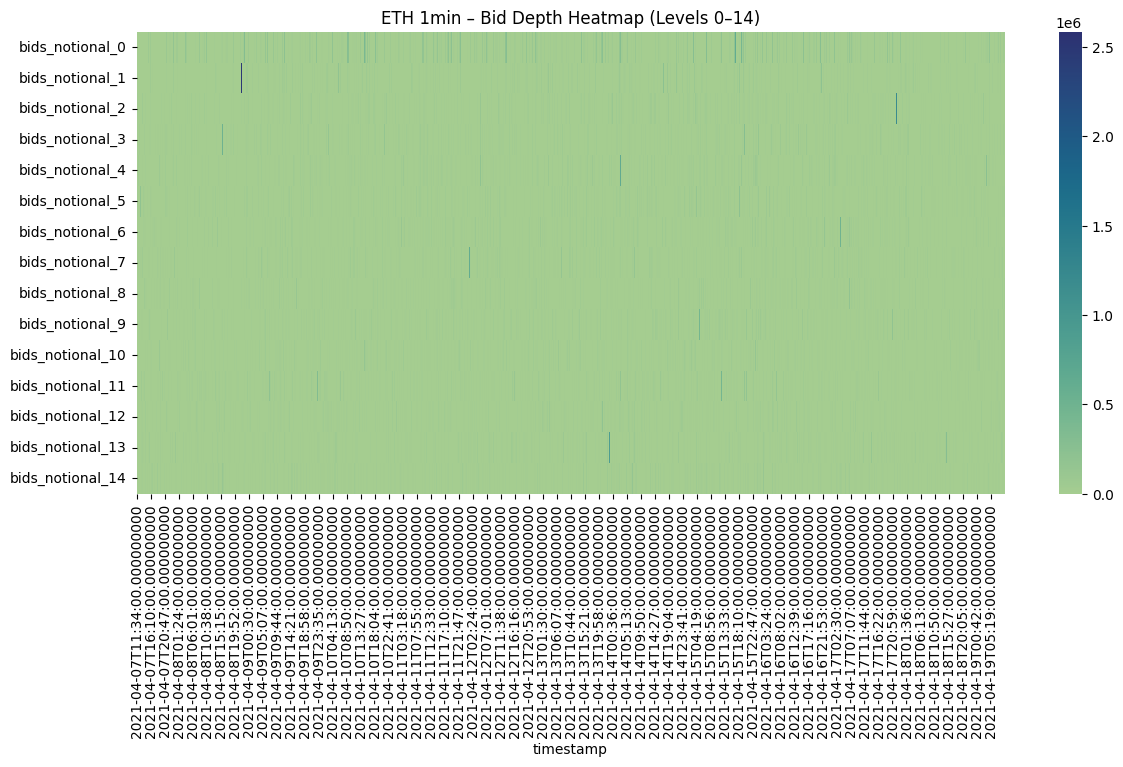

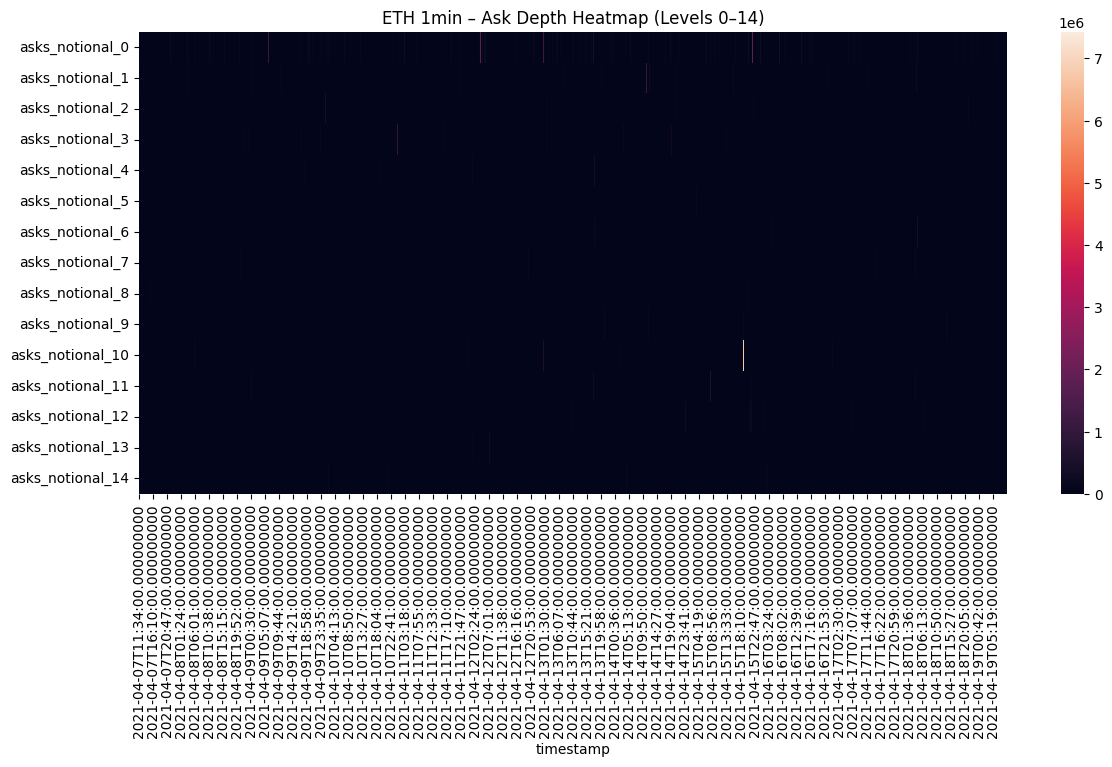

In [20]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[bid_levels].T, cmap='crest', cbar=True)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14)')
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(depth_data[ask_levels].T, cmap='rocket', cbar=True)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14)')
plt.show()


There are just a few eye-catching spots on each heatmap. The log1p scaled potentionally show more information.

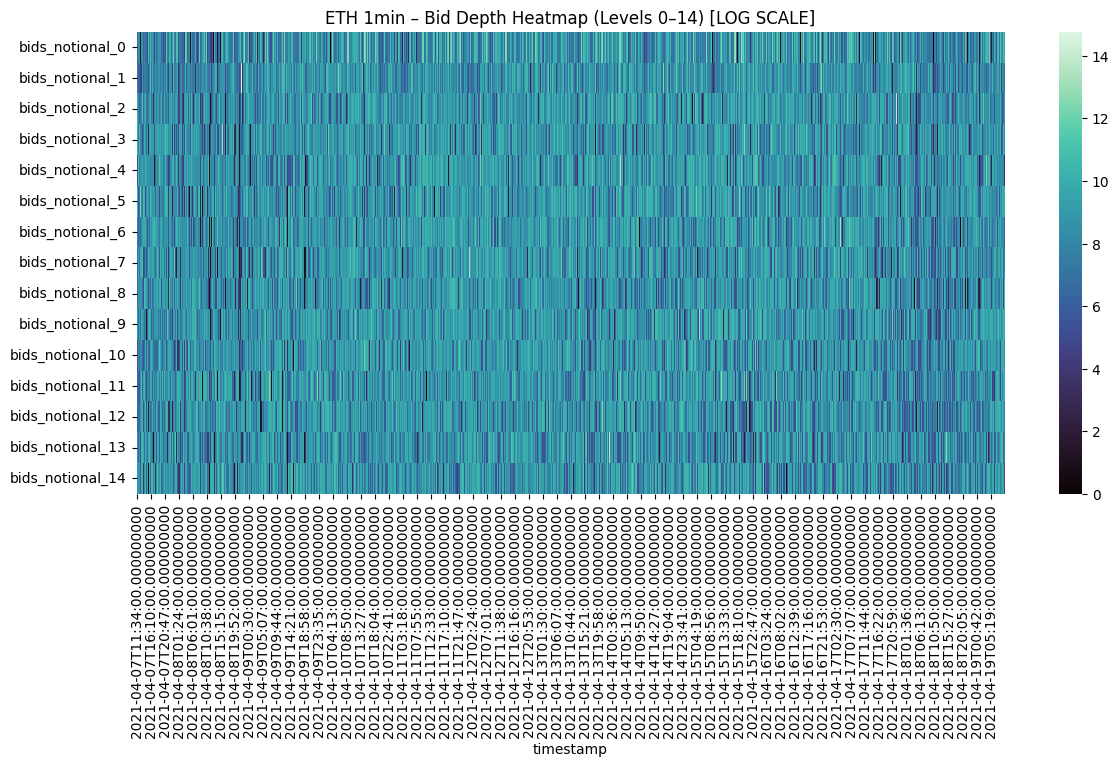

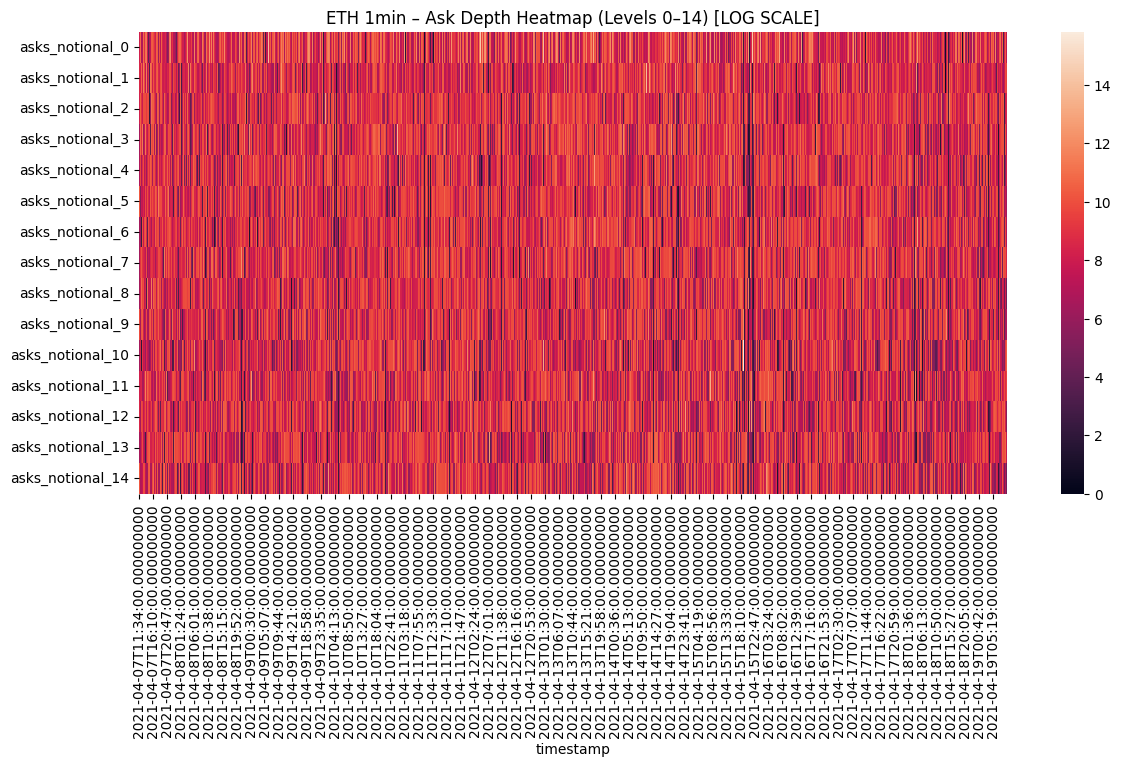

In [21]:
bid_levels = [f'bids_notional_{i}' for i in range(15)]
ask_levels = [f'asks_notional_{i}' for i in range(15)]

# Combine to 2D matrix
depth_data = pd.DataFrame({
    'timestamp': df.index,
    **{lvl: df[lvl] for lvl in bid_levels + ask_levels}
})

bid_data_log = np.log1p(depth_data[bid_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    bid_data_log,
    cmap='mako', 
    cbar=True
)
plt.title(f'{asset} {freq} – Bid Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()

ask_data_log = np.log1p(depth_data[ask_levels].T)

plt.figure(figsize=(14, 6))
sns.heatmap(
    ask_data_log,
    cmap='rocket', 
    cbar=True
)
plt.title(f'{asset} {freq} – Ask Depth Heatmap (Levels 0–14) [LOG SCALE]')
plt.show()


At both heatmap the forst level is brighter than others (most orders executed close to the mid price). Also it is easier to understand low-volume areas (dark regions) with log scaled Notional volume. This information can be important for model. 

### Notional Volume

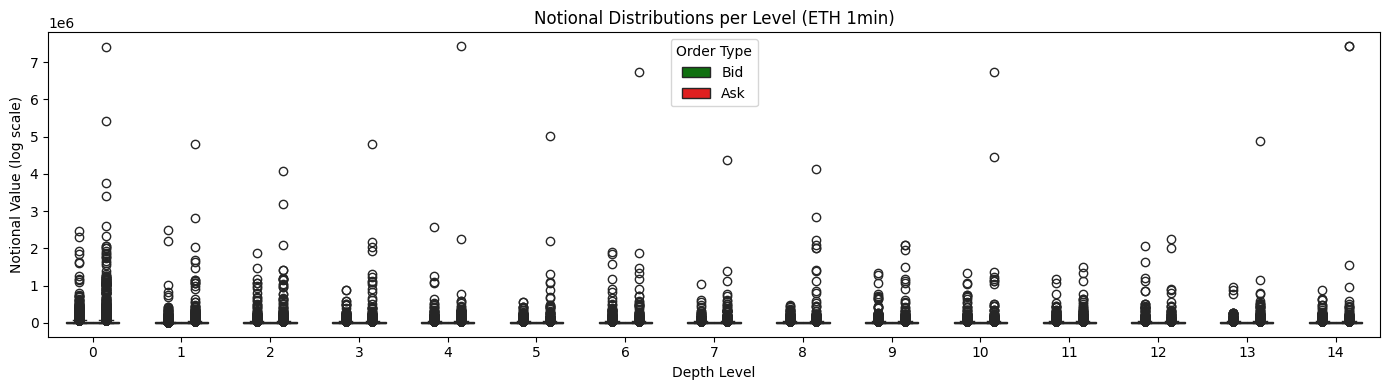

In [22]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_notional_{i}'], df[f'asks_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title('Notional Distributions per Level ({} {})'.format(asset, freq))
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

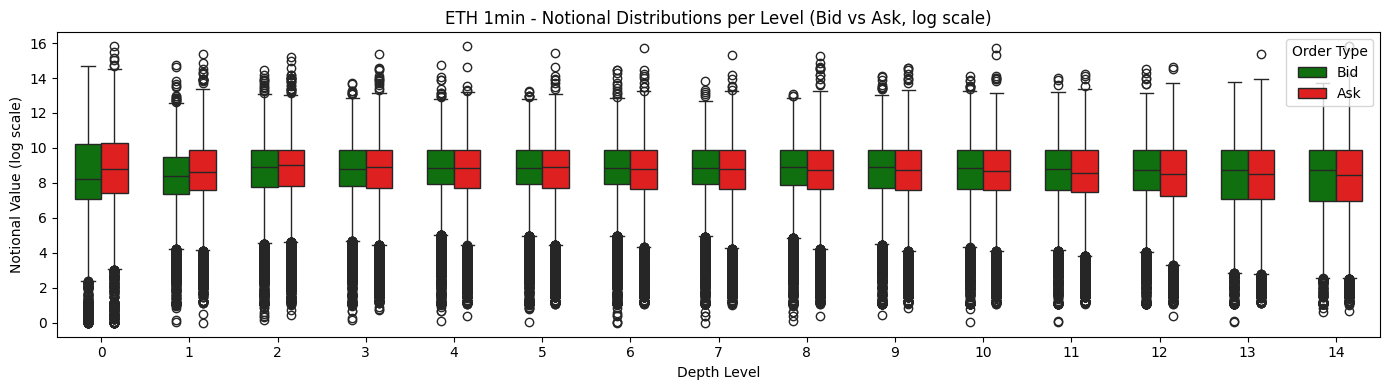

In [23]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.title(f'{asset} {freq} - Notional Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

The most pairs of Bid/Ask are close to earch other in terms of distribution of Notional volume, except the first level, where the volume is above other levels.

### Distance from midpoint

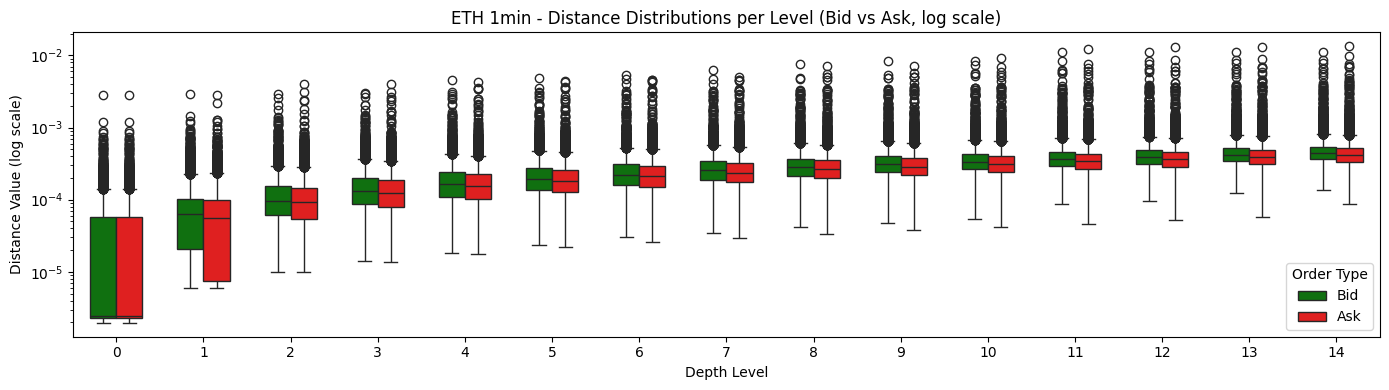

In [24]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_distance_{i}']*(-1), df[f'asks_distance_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

plt.yscale('log') 
plt.title(f'{asset} {freq} - Distance Distributions per Level (Bid vs Ask, log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Distance Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Usually the distance at the 0 level is very close to 0. At levels 1-14 the distance increases gradually.

### Calcel Volume

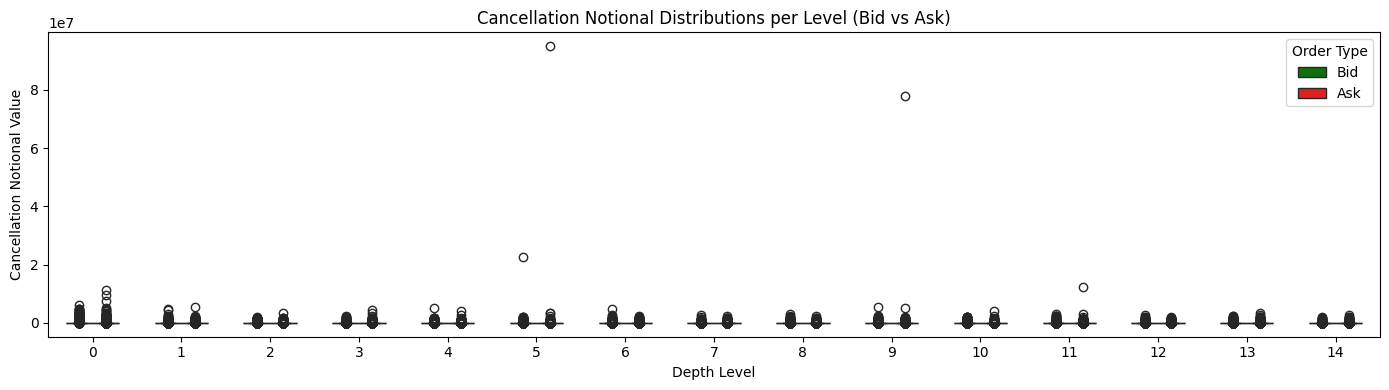

In [25]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_cancel_notional_{i}'], df[f'asks_cancel_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title('Cancellation Notional Distributions per Level (Bid vs Ask)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [26]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
197154,5,Ask,94993152.0
325098,9,Ask,77984176.0


there are 2 outliers

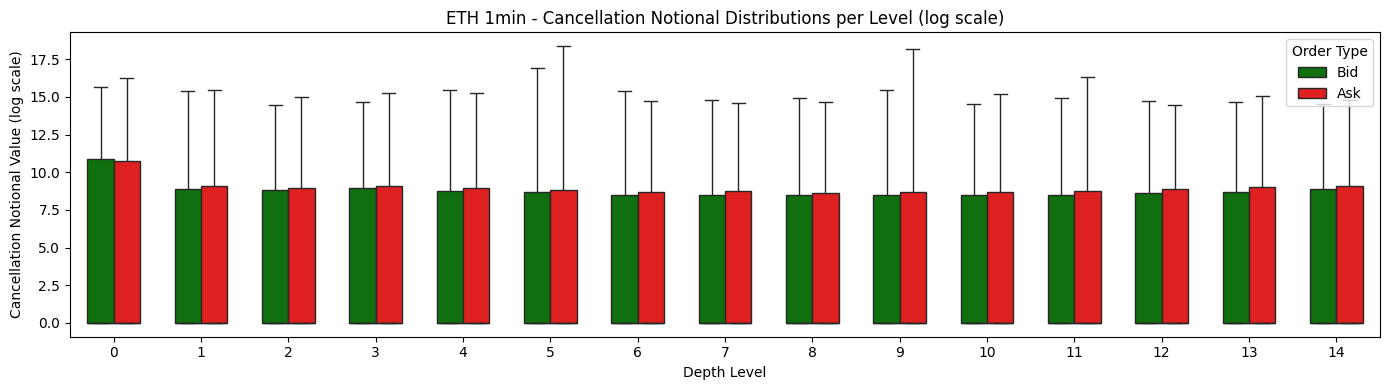

In [27]:
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Cancellation Notional Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Cancellation Notional Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

As already discovered, there are a lot of zeros at the cancelation volumes, therefore for all distributions the medioan is 0.

### Limit Volume

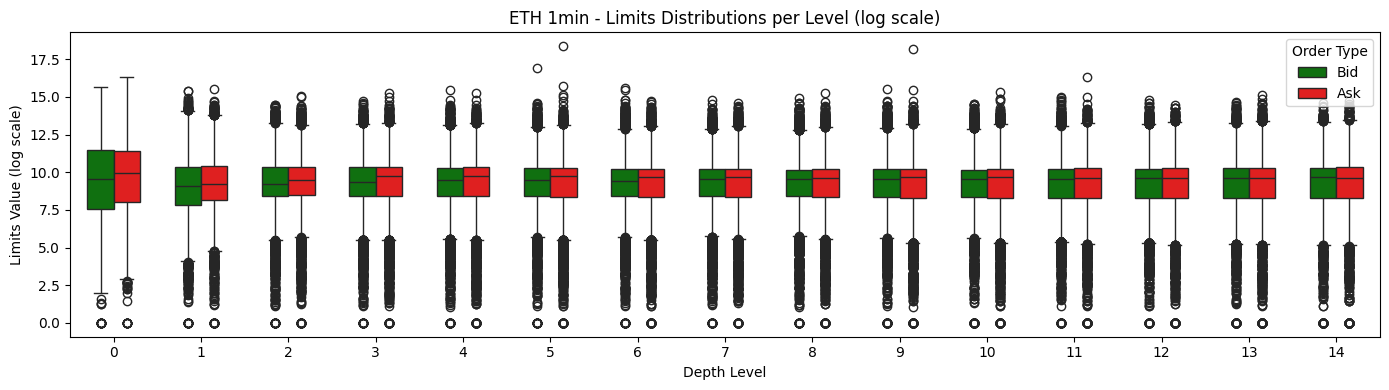

In [28]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_limit_notional_{i}'], df[f'asks_limit_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)
df_box_all['Value'] = np.log1p(df_box_all['Value']) # log scale

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)
#plt.yscale('log') 
plt.title(f'{asset} {freq} - Limits Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Limits Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Limit volume is higher for 0 level and stable on other levels.

### Market Volume

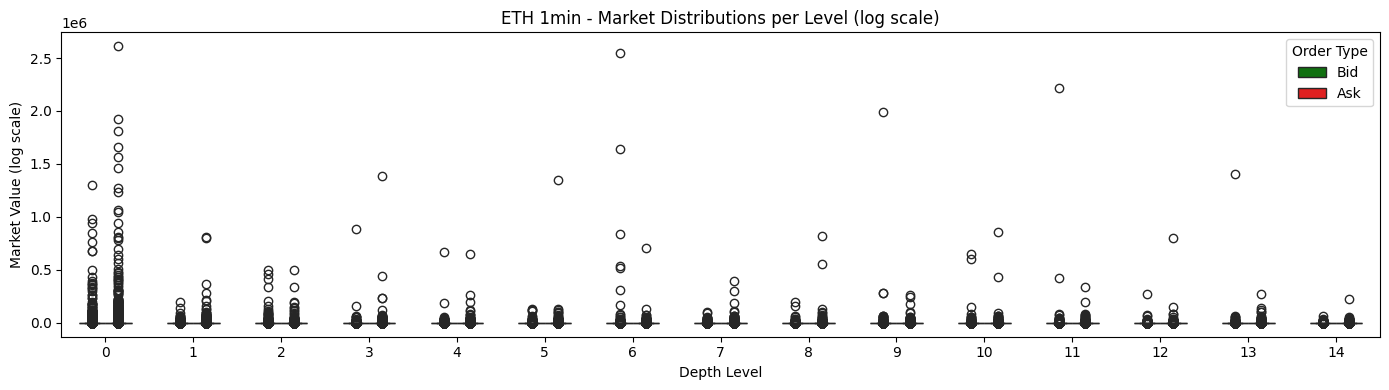

In [29]:
levels = range(15)
data = []

for i in levels:
    data.append(pd.DataFrame({
        'Level': [i] * len(df) * 2,
        'Type': ['Bid'] * len(df) + ['Ask'] * len(df),
        'Value': pd.concat([df[f'bids_market_notional_{i}'], df[f'asks_market_notional_{i}']], ignore_index=True)
    }))

df_box_all = pd.concat(data, ignore_index=True)

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

In [30]:
df_box_all[df_box_all['Value'] >= max(df_box_all['Value']*0.30)]

,Level,Type,Value
10200,0,Bid,9.837830e+05
14678,0,Bid,9.446112e+05
14910,0,Bid,1.298825e+06
16117,0,Bid,8.528251e+05
17131,0,Ask,9.457411e+05
23844,0,Ask,1.044591e+06
26652,0,Ask,1.565690e+06
26831,0,Ask,2.611694e+06
27747,0,Ask,1.065209e+06
27749,0,Ask,8.140813e+05


There are some outliers standing out from the general scope.

In [31]:
df_box_all= df_box_all[df_box_all['Value'] < max(df_box_all['Value']*0.30)]


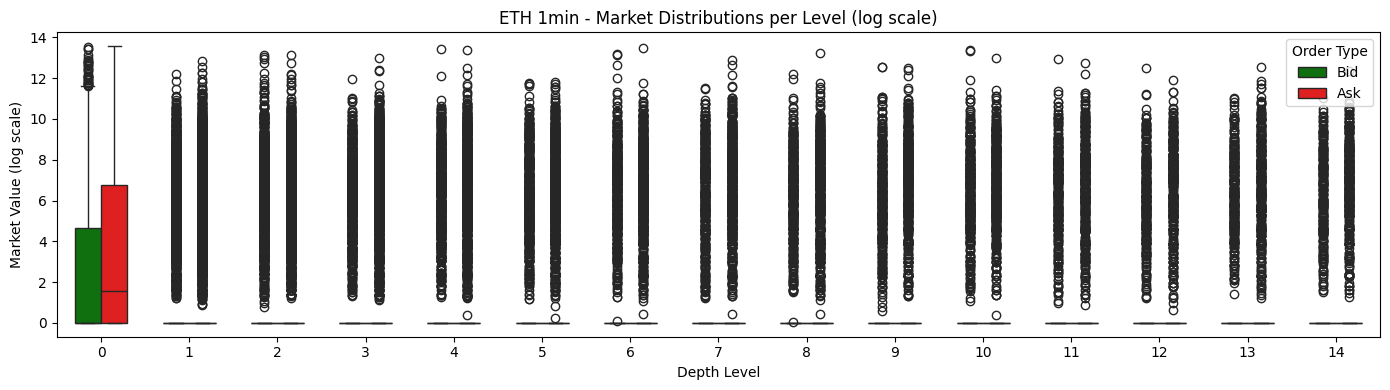

In [32]:
df_box_all['Value'] = np.log1p(df_box_all['Value'])

plt.figure(figsize=(14, 4))
sns.boxplot(
    data=df_box_all,
    x='Level',
    y='Value',
    hue='Type',
    palette={'Bid': 'green', 'Ask': 'red'},
    width=0.6
)

#plt.yscale('log') 
plt.title(f'{asset} {freq} - Market Distributions per Level (log scale)')
plt.xlabel('Depth Level')
plt.ylabel('Market Value (log scale)')
plt.legend(title='Order Type')
plt.tight_layout()
plt.show()

Similary to the Cancel volume, the Market volume shows mainly zero values on the levels 1-14. 

### Correlation matrix

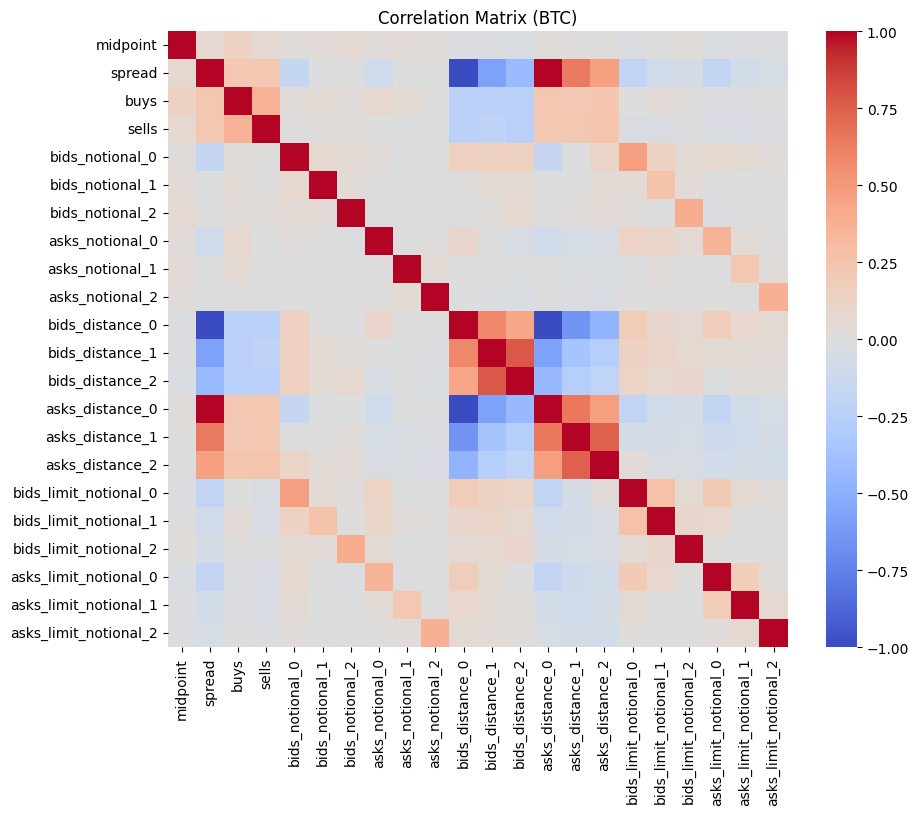

In [ ]:
corr_features = ['midpoint', 'spread', 'buys', 'sells'] + \
                 [f'bids_notional_{i}' for i in range(3)] + \
                 [f'asks_notional_{i}' for i in range(3)] + \
                 [f'bids_distance_{i}' for i in range(3)] + \
                 [f'asks_distance_{i}' for i in range(3)] + \
                 [f'bids_limit_notional_{i}' for i in range(3)] + \
                 [f'asks_limit_notional_{i}' for i in range(3)]

corr = df[corr_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix ({} {})'.format(asset, freq))
plt.show()

There is a weak positive correlation between spread&sells and buys&sells, which usually make sence it any market. 

Also, there is a strong negative correlation between **spread** & **bids_distance_0** and strong positive correlation between **spread** & **asks_distance_0**. (the correlations decreases in absolute values for deeper levels)

There is strong negative correlation between **bids_distance_0** & **asks_distance_0**, whcih is also logically correct, because these features depends on the market activity at the considered time interval.